In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [2]:
#importing the dataset
df=pd.read_csv('Walmart DataSet.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [106]:
#Checking for null values
df.isna().sum().sum()

0

In [108]:
#Checking for duplicate values
df.duplicated().sum()

0

In [122]:
#Splitting the data into small dataframes for individual stores

store_groups =df.groupby("Store")
store_dfs = {store: group for store, group in store_groups}

a. If the weekly sales are affected by the unemployment rate, if yes which stores are suffering the most?
---------------------

In [5]:
unemp_corr = {}

for i in range(1, 46):
    dummy = store_dfs[i]
    pc = dummy['Weekly_Sales'].corr(dummy['Unemployment'])
    unemp_corr[i] = {'Store': i, 'Correlation': pc}

# Convert the dictionary to a DataFrame 
unemp_corr_df = pd.DataFrame.from_dict(unemp_corr, orient='index')


In [6]:
unemp_corr_df

,Store,Correlation
1,1,-0.097955
2,2,0.066325
3,3,-0.230413
4,4,-0.337015
5,5,-0.207043
6,6,0.044251
7,7,-0.165382
8,8,-0.052580
9,9,-0.191534
10,10,0.131908


In [191]:
#Stores with high correlation in weekly sales and unemployment
unemp_corr_df.sort_values('Correlation',ascending=False).head(3)

,Store,Correlation
36,36,0.833734
35,35,0.483865
21,21,0.218367


b. If the weekly sales show a seasonal trend, when and what could be the reason?
--------

In [123]:
store1=store_dfs[1].copy()

store1['Date']=pd.to_datetime(store1['Date'],dayfirst=True)


In [124]:
store1.set_index('Date',inplace=True)

In [125]:
store1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1,1573072.81,0,62.99,3.601,223.381296,6.573


In [129]:
store1.drop(['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],axis=1,inplace=True)

In [133]:
store1

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


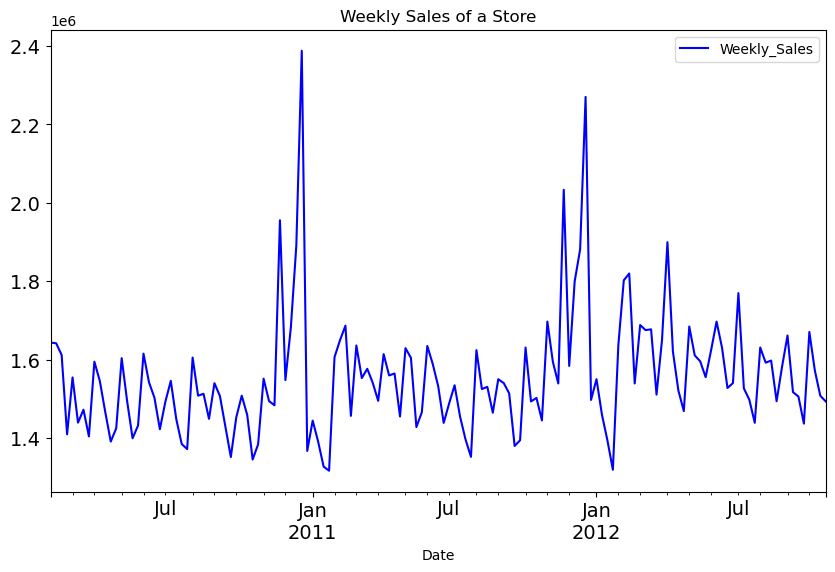

In [139]:
store1.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

c. Does temperature affect the weekly sales in any manner?
--------

In [8]:
temp_corr={}

for i in range(1,46):
    dummy=store_dfs[i]
    tc=dummy['Temperature'].corr(dummy['Weekly_Sales'])
    temp_corr[i]={'store':i,'t_correlation':tc}

In [9]:
temp_corr=pd.DataFrame.from_dict(temp_corr,orient='index')

In [10]:
temp_corr

,store,t_correlation
1,1,-0.222701
2,2,-0.297673
3,3,-0.377524
4,4,-0.225583
5,5,-0.175517
6,6,-0.084863
7,7,0.015077
8,8,-0.312324
9,9,-0.208343
10,10,-0.432569


d. How is the Consumer Price index affecting the weekly sales of various stores?
----------

In [11]:
cpi_corr={}

for i in range (1,46):
    dummy=store_dfs[i]
    cc=dummy['CPI'].corr(dummy['Weekly_Sales'])
    cpi_corr[i]={'store':i,'correlation':cc}

In [12]:
cpi_corr=pd.DataFrame.from_dict(cpi_corr,orient='index')

In [13]:
cpi_corr

,store,correlation
1,1,0.225408
2,2,-0.062431
3,3,0.317250
4,4,0.351157
5,5,0.308261
6,6,-0.011357
7,7,0.289044
8,8,0.120255
9,9,0.294805
10,10,-0.115374


e. Top performing stores according to the historical data.
----

In [194]:
df_sales=df.groupby('Store')[['Weekly_Sales']].sum()

In [195]:
df_sales['Weekly_Sales']=df_sales['Weekly_Sales'].astype(int)

In [196]:
df_sales

,Weekly_Sales
Store,
1,222402808
2,275382440
3,57586735
4,299543953
5,45475688
6,223756130
7,81598275
8,129951181
9,77789218


In [197]:
df_sales.sort_values('Weekly_Sales',ascending=False).head(10)

,Weekly_Sales
Store,
20,301397792
4,299543953
14,288999911
13,286517703
2,275382440
10,271617713
27,253855916
6,223756130
1,222402808


f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.
-----

In [198]:
df_sales.sort_values('Weekly_Sales',ascending=False,inplace=True)

In [201]:
df_sales.head(1)

,Weekly_Sales
Store,
20,301397792


In [205]:
301397792-37160221

264237571

In [203]:
df_sales.tail(1)

,Weekly_Sales
Store,
33,37160221


In [200]:
(df_sales.head(1).sum())/(df_sales.tail(1).sum())

Weekly_Sales    8.110764
dtype: float64

In [19]:
(df_sales.head(10).sum())/(df_sales.tail(10).sum())

Weekly_Sales    4.532933
dtype: float64

Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.
-----------------

In [20]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [29]:
sales=df[['Store','Date','Weekly_Sales']]

In [30]:
sales

,Store,Date,Weekly_Sales
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68
...,...,...,...
6430,45,28-09-2012,713173.95
6431,45,05-10-2012,733455.07
6432,45,12-10-2012,734464.36
6433,45,19-10-2012,718125.53


In [31]:
stores=sales.groupby('Store')
store_df={store: group for store, group in stores}

In [32]:
store_df[1]

,Store,Date,Weekly_Sales
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68
...,...,...,...
138,1,28-09-2012,1437059.26
139,1,05-10-2012,1670785.97
140,1,12-10-2012,1573072.81
141,1,19-10-2012,1508068.77


In [89]:
Store1=store_df[1].copy()

In [90]:
Store1.drop('Store',axis=1,inplace=True)

In [91]:
Store1['Date']=pd.to_datetime(Store1['Date'],dayfirst=True).dt.strftime("%y-%m-%d")

In [92]:
Store1['Date']=pd.to_datetime(Store1['Date'],yearfirst=True)

C:\Users\suryasu\AppData\Local\Temp\ipykernel_20604\1235603390.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Store1['Date']=pd.to_datetime(Store1['Date'],yearfirst=True)


In [83]:
#Store1.set_index('Date',inplace=True)

In [93]:
Store1

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [94]:
Store1.columns=['ds','y']

In [95]:
Store1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      143 non-null    datetime64[ns]
 1   y       143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 KB


Model building
-----------

In [97]:
model=Prophet()

In [98]:
model.fit(Store1)

13:33:40 - cmdstanpy - INFO - Chain [1] start processing
13:33:40 - cmdstanpy - INFO - Chain [1] done processing


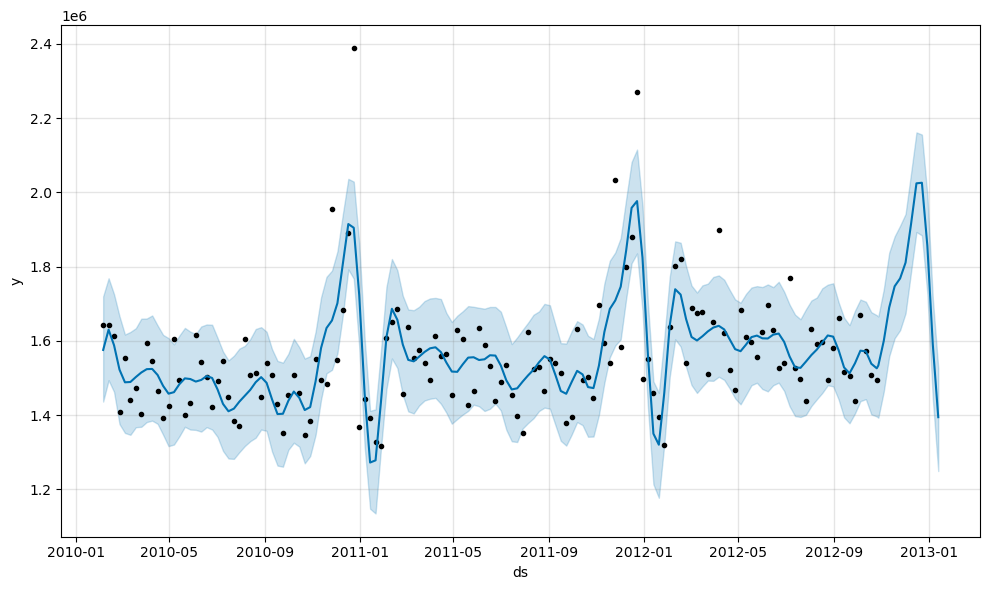

In [190]:
# Make a future dataframe for 1 year
future = model.make_future_dataframe(periods=12,freq='W')
    
# Make sales forecast
forecast = model.predict(future)
    
# You can plot the forecast
model.plot(forecast);


Evaluating the model
--------------

In [184]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model,initial='800 days', period='42 days', horizon='84 days', parallel="processes")
df_p = performance_metrics(df_cv, rolling_window=1)
rmse = df_p['rmse'].values

In [185]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-05-18,1.616759e+06,1.474609e+06,1.755214e+06,1595901.87,2012-05-11
1,2012-05-25,1.610429e+06,1.467124e+06,1.742830e+06,1555444.55,2012-05-11
2,2012-06-01,1.599144e+06,1.463364e+06,1.728956e+06,1624477.58,2012-05-11
3,2012-06-08,1.604511e+06,1.463730e+06,1.742231e+06,1697230.96,2012-05-11
4,2012-06-15,1.621698e+06,1.487820e+06,1.767105e+06,1630607.00,2012-05-11
5,2012-06-22,1.621951e+06,1.477274e+06,1.770602e+06,1527845.81,2012-05-11
6,2012-06-29,1.588613e+06,1.448680e+06,1.736006e+06,1540421.49,2012-05-11
7,2012-07-06,1.541261e+06,1.404377e+06,1.703111e+06,1769854.16,2012-05-11
8,2012-07-13,1.516158e+06,1.371697e+06,1.647582e+06,1527014.04,2012-05-11
9,2012-07-20,1.526766e+06,1.381235e+06,1.665947e+06,1497954.76,2012-05-11


In [186]:
df_p = performance_metrics(df_cv)

In [187]:
df_p 

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,4.784583e+08,21873.688802,18959.940051,0.012118,0.013069,0.012023,1.000000
1,14 days,2.013299e+10,141890.769964,104540.888696,0.060899,0.035350,0.063920,0.666667
2,21 days,6.930647e+09,83250.506465,59040.342634,0.039013,0.015595,0.037632,0.666667
3,28 days,3.756503e+09,61290.317678,55204.937439,0.033967,0.024809,0.034293,1.000000
4,35 days,6.955434e+09,83399.245185,70304.470669,0.045906,0.052442,0.045360,1.000000
5,42 days,4.333367e+09,65828.314743,55917.757690,0.035736,0.038982,0.035373,1.000000
6,49 days,8.741821e+08,29566.571348,24222.997994,0.015693,0.008008,0.015533,1.000000
7,56 days,2.153973e+10,146764.199207,115064.727780,0.069970,0.077281,0.071982,0.666667
8,63 days,8.861101e+09,94133.420011,79008.367991,0.050657,0.055063,0.049899,1.000000
9,70 days,8.593010e+08,29313.836878,23760.619288,0.015360,0.019234,0.015184,1.000000


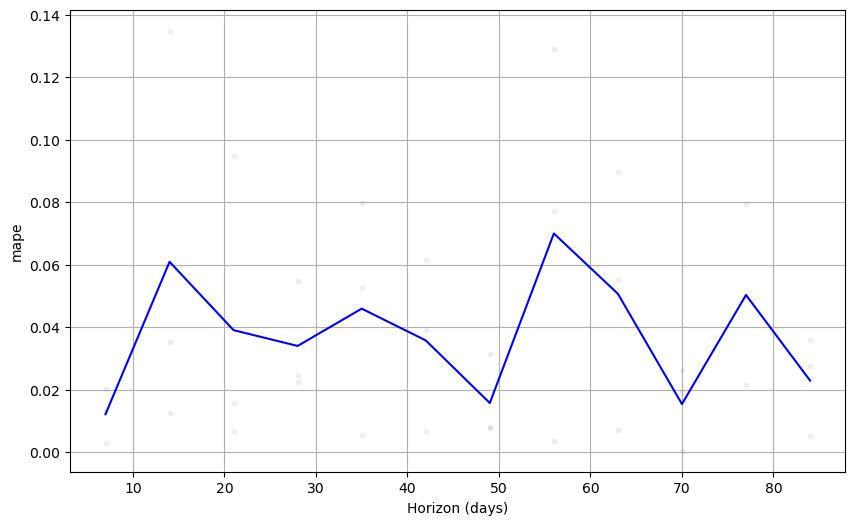

In [188]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [189]:
rmse

array([83395.3616376])

For all the stores
-------------------

In [ ]:
df = pd.read_csv('Walmart DataSet.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Loop through each store
for store in df['Store'].unique():
    # Filter data for each store
    store_data = df[df['Store'] == store]
    
    # Prepare the data
    sales_df = store_data[['Date', 'Weekly_Sales']]
    sales_df.columns = ['ds', 'y']
    
    # Initialize a Prophet model
    model = Prophet()
    
    # Fit the model with your data
    model.fit(sales_df)
    
    # Make a future dataframe for 12 weeks
    future = model.make_future_dataframe(periods=12, freq='W')
    
    # Make sales forecast
    forecast = model.predict(future)
    
    # You can plot the forecast
    model.plot(forecast)